In [54]:
%matplotlib inline

from modsim import *

In [55]:
def make_system(T_init = 150, Area = 0.0044, T_air = 25, k = 0.23, d = 0.01, m = 20, c = 3.77, t0 = 0, t_end = 20*60, dt = 1):
    init = State(temp=T_init)
    
    system = System(init = init, Area = Area, T_air = T_air, k = k, d = d, m = m, c = c, t0 = t0, t_end = t_end, dt = dt)
    return system

cheese = make_system()

cheese

,value
init,temp 150 dtype: int64
Area,0.0044
T_air,25
k,0.23
d,0.01
m,20
c,3.77
t0,0
t_end,1200
dt,1


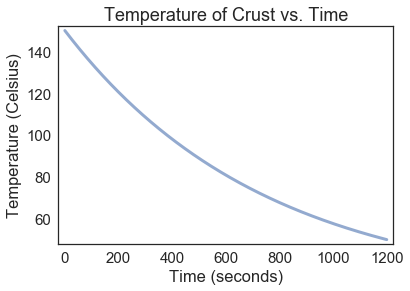

In [56]:
def update(state, system):
    unpack(system)
    T = state.temp
    T += - (k*Area*(T-T_air) * dt / (d * m * c))
    
    return State(temp=T)

def run_simulation_cheese(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system)
        
    system.results = frame
    return system.results
results = run_simulation_cheese(cheese, update)
plot(results)
xlabel('Time (seconds)')
ylabel('Temperature (Celsius)')
title('Temperature of Crust vs. Time')

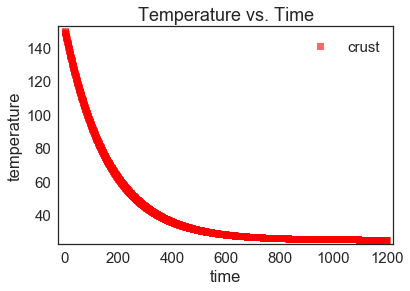

In [57]:
def make_system2(T_init = 150, Area1 = 0.0044, T_air = 25, k = 0.23, d = 0.01, m1 = 5, c1 = 2.87, h = 20, t0 = 0, t_end = 20*60, dt = 1):
    init = State(temp=T_init)
    
    system = System(init = init, Area = Area1, T_air = T_air, h = h, t0 = t0, t_end = t_end, dt = dt, m = m1, c = c1)
    return system

def update2(state, system):
    unpack(system)
    
    T = state.temp
    T += - (h*Area*(T-T_air) * dt)/ (m * c)
    return State(temp=T)

def run_simulation_crust(system, update_func):
   
    frame1 = TimeFrame(columns = init.index)
    frame1.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    for t in ts:
        frame1.loc[t+dt] = update_func(frame1.loc[t], system)
    system.results = frame1
    return system.results
crust = make_system2()
results2 = run_simulation_crust(crust, update2)
plot(results2, 'rs', label = 'crust')
xlabel('time')
ylabel('temperature')
title('Temperature vs. Time')
legend()

In [58]:
r_array = 0.01 * linspace(1, 4, 10)
r_array

array([ 0.01      ,  0.01333333,  0.01666667,  0.02      ,  0.02333333,
        0.02666667,  0.03      ,  0.03333333,  0.03666667,  0.04      ])

In [59]:
Area_array = 2 * 3.14 * r_array**2 + 2 * 3.14 * r_array * 0.05
Area_array


array([ 0.003768  ,  0.00530311,  0.00697778,  0.008792  ,  0.01074578,
        0.01283911,  0.015072  ,  0.01744444,  0.01995644,  0.022608  ])

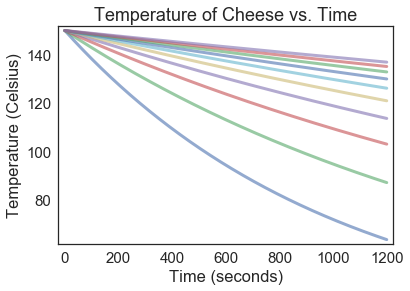

In [60]:
for r in r_array:
    cheese = make_system(Area = 2 * 3.14 * r**2 + 2 * 3.14 * r * 0.05, m = 3.14 * pi * r**2 * 0.05 * 473396, d = r)
    results = run_simulation_cheese(cheese, update)
    plot(results)
    xlabel('Time (seconds)')
    ylabel('Temperature (Celsius)')
    title('Temperature of Cheese vs. Time')